[*********************100%***********************]  1 of 1 completed


Price        Close    High     Low    Open   Volume  SMA_20  SMA_50  \
Ticker     GGAL.BA GGAL.BA GGAL.BA GGAL.BA  GGAL.BA                   
Date                                                                  
2025-01-09  8640.0  8700.0  8500.0  8500.0   849011  7607.0  6806.4   
2025-01-10  8630.0  8700.0  8250.0  8600.0  2447246  7729.0  6854.0   
2025-01-13  8110.0  8690.0  8080.0  8650.0  3044814  7808.0  6893.2   
2025-01-14  8430.0  8560.0  8170.0  8200.0  2719284  7899.0  6941.0   
2025-01-16  8310.0  8580.0  8260.0  8500.0  1737554  7976.5  6985.2   

Price            EMA_20        RSI        MACD MACD_Signal  MACD_Hist  \
Ticker                                                                  
Date                                                                    
2025-01-09  7717.437024  63.120567  532.470751  445.348515  87.122236   
2025-01-10  7804.347784  70.355731  539.029200  464.084652  74.944547   
2025-01-13  7833.457519  66.171004  496.543321  470.576386  25.966

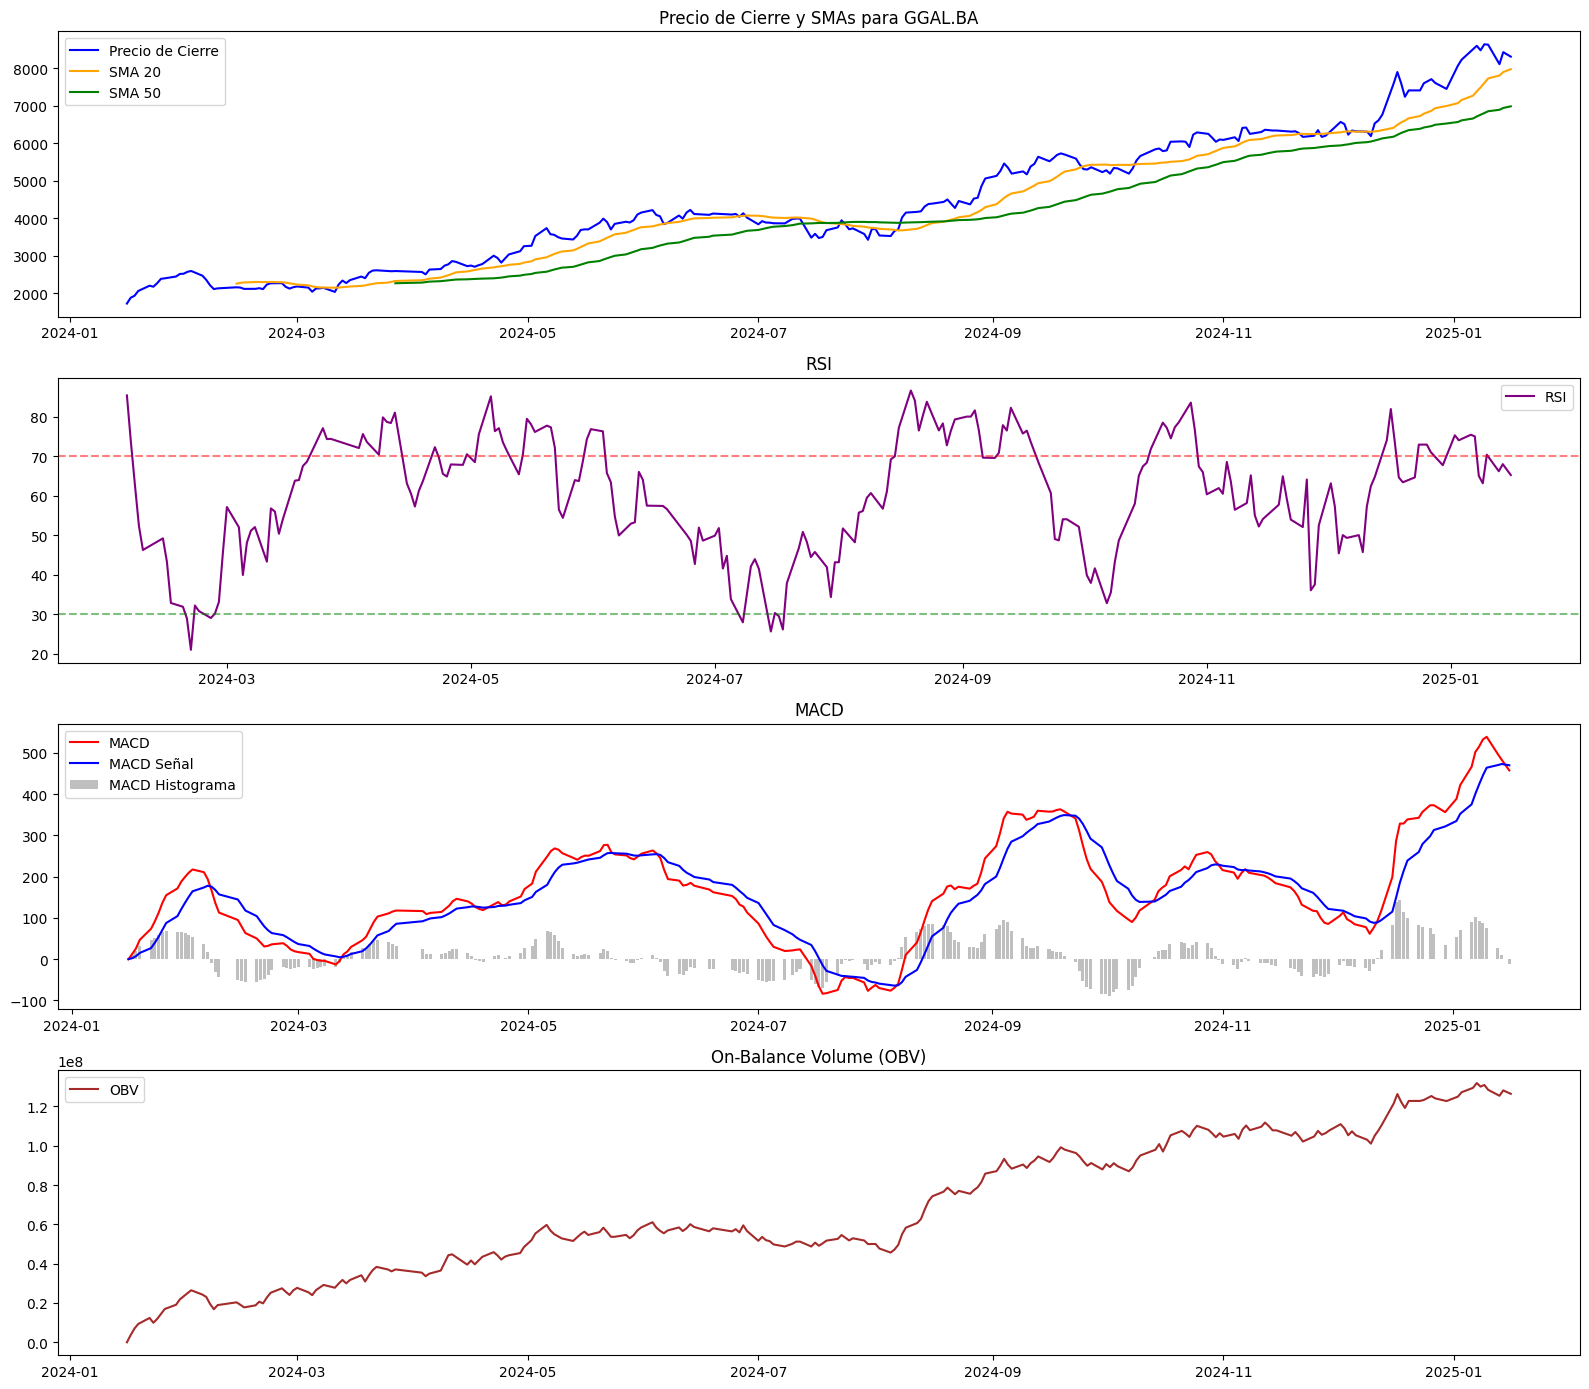

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def obtener_datos_y_calcular_indicadores_pandas(ticker, periodo="1y"):
    """Descarga datos y calcula indicadores técnicos con Pandas."""
    try:
        data = yf.download(ticker, period=periodo)
        if data.empty:
            print(f"No se encontraron datos para {ticker}")
            return None

        data['SMA_20'] = data['Close'].rolling(window=20).mean()
        data['SMA_50'] = data['Close'].rolling(window=50).mean()
        data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
        data['RSI'] = calcular_rsi(data['Close'], 14)
        data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = calcular_macd(data['Close'], 12, 26, 9) #Histrograma agregado
        data['ATR'] = calcular_atr(data['High'], data['Low'], data['Close'], 14)
        data['OBV'] = calcular_obv(data['Close'], data['Volume']) #Calcula OBV

        return data

    except Exception as e:
        print(f"Error: {e}")
        return None

def calcular_rsi(precios, periodo=14):
    delta = precios.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ma_up = up.rolling(window=periodo).mean()
    ma_down = down.rolling(window=periodo).mean()
    rsi = 100 - (100 / (1 + ma_up / ma_down))
    return rsi

def calcular_macd(precios, periodo_corto=12, periodo_largo=26, periodo_senal=9):
    """Calcula MACD, Señal y Histograma."""
    ema_corto = precios.ewm(span=periodo_corto, adjust=False).mean()
    ema_largo = precios.ewm(span=periodo_largo, adjust=False).mean()
    macd = ema_corto - ema_largo
    senal = macd.ewm(span=periodo_senal, adjust=False).mean()
    histograma = macd - senal # Calcula el histograma
    return macd, senal, histograma

def calcular_atr(high, low, close, periodo=14):
    high_low = high - low
    high_close = np.abs(high - close.shift())
    low_close = np.abs(low - close.shift())
    rango_verdadero = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = rango_verdadero.rolling(window=periodo).mean()
    return atr

def calcular_obv(close, volume):
    """Calcula el On-Balance Volume (OBV)."""
    obv = (np.sign(close.diff()) * volume).fillna(0).cumsum()
    return obv

def graficar_datos(data, ticker):
    if data is None:
        return
    plt.figure(figsize=(16, 14)) # Ajuste en el tamaño de la figura

    plt.subplot(4, 1, 1) # Se ajusta la cantidad de subplots
    plt.plot(data['Close'], label='Precio de Cierre', color='blue')
    plt.plot(data['SMA_20'], label='SMA 20', color='orange')
    plt.plot(data['SMA_50'], label='SMA 50', color='green')
    plt.title(f'Precio de Cierre y SMAs para {ticker}')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', alpha=0.5)
    plt.axhline(30, color='green', linestyle='--', alpha=0.5)
    plt.title('RSI')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(data['MACD'], label='MACD', color='red')
    plt.plot(data['MACD_Signal'], label='MACD Señal', color='blue')
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histograma', color='grey', alpha=0.5) #Histograma agregado
    plt.title('MACD')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(data['OBV'], label='OBV', color='brown')
    plt.title('On-Balance Volume (OBV)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
ticker = "GGAL.BA"
data = obtener_datos_y_calcular_indicadores_pandas(ticker)

if data is not None:
    print(data.tail())
    graficar_datos(data, ticker)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price        Close    High     Low    Open   Volume  SMA_20       SMA_50  \
Ticker     GGAL.BA GGAL.BA GGAL.BA GGAL.BA  GGAL.BA                        
Date                                                                       
2025-03-19  7470.0  7510.0  7200.0  7220.0  2582617  7101.0  7594.912383   
2025-03-20  7270.0  7390.0  7230.0  7330.0  2570791  7101.5  7568.312383   
2025-03-21  7540.0  7560.0  7280.0  7320.0  2116698  7113.0  7549.512383   
2025-03-25  7650.0  7760.0  7560.0  7590.0  2729336  7131.5  7529.712383   
2025-03-26  7480.0  7750.0  7420.0  7650.0  2303858  7148.0  7506.712383   

Price            EMA_20        RSI       MACD MACD_Signal  MACD_Hist  \
Ticker                                                                 
Date                                                                   
2025-03-19  7178.464656  58.450704 -51.866942 -126.681367  74.814425   
2025-03-20  7187.182308  52.249135 -39.462786 -109.237651  69.774865   
2025-03-21  7220.783993  62.676

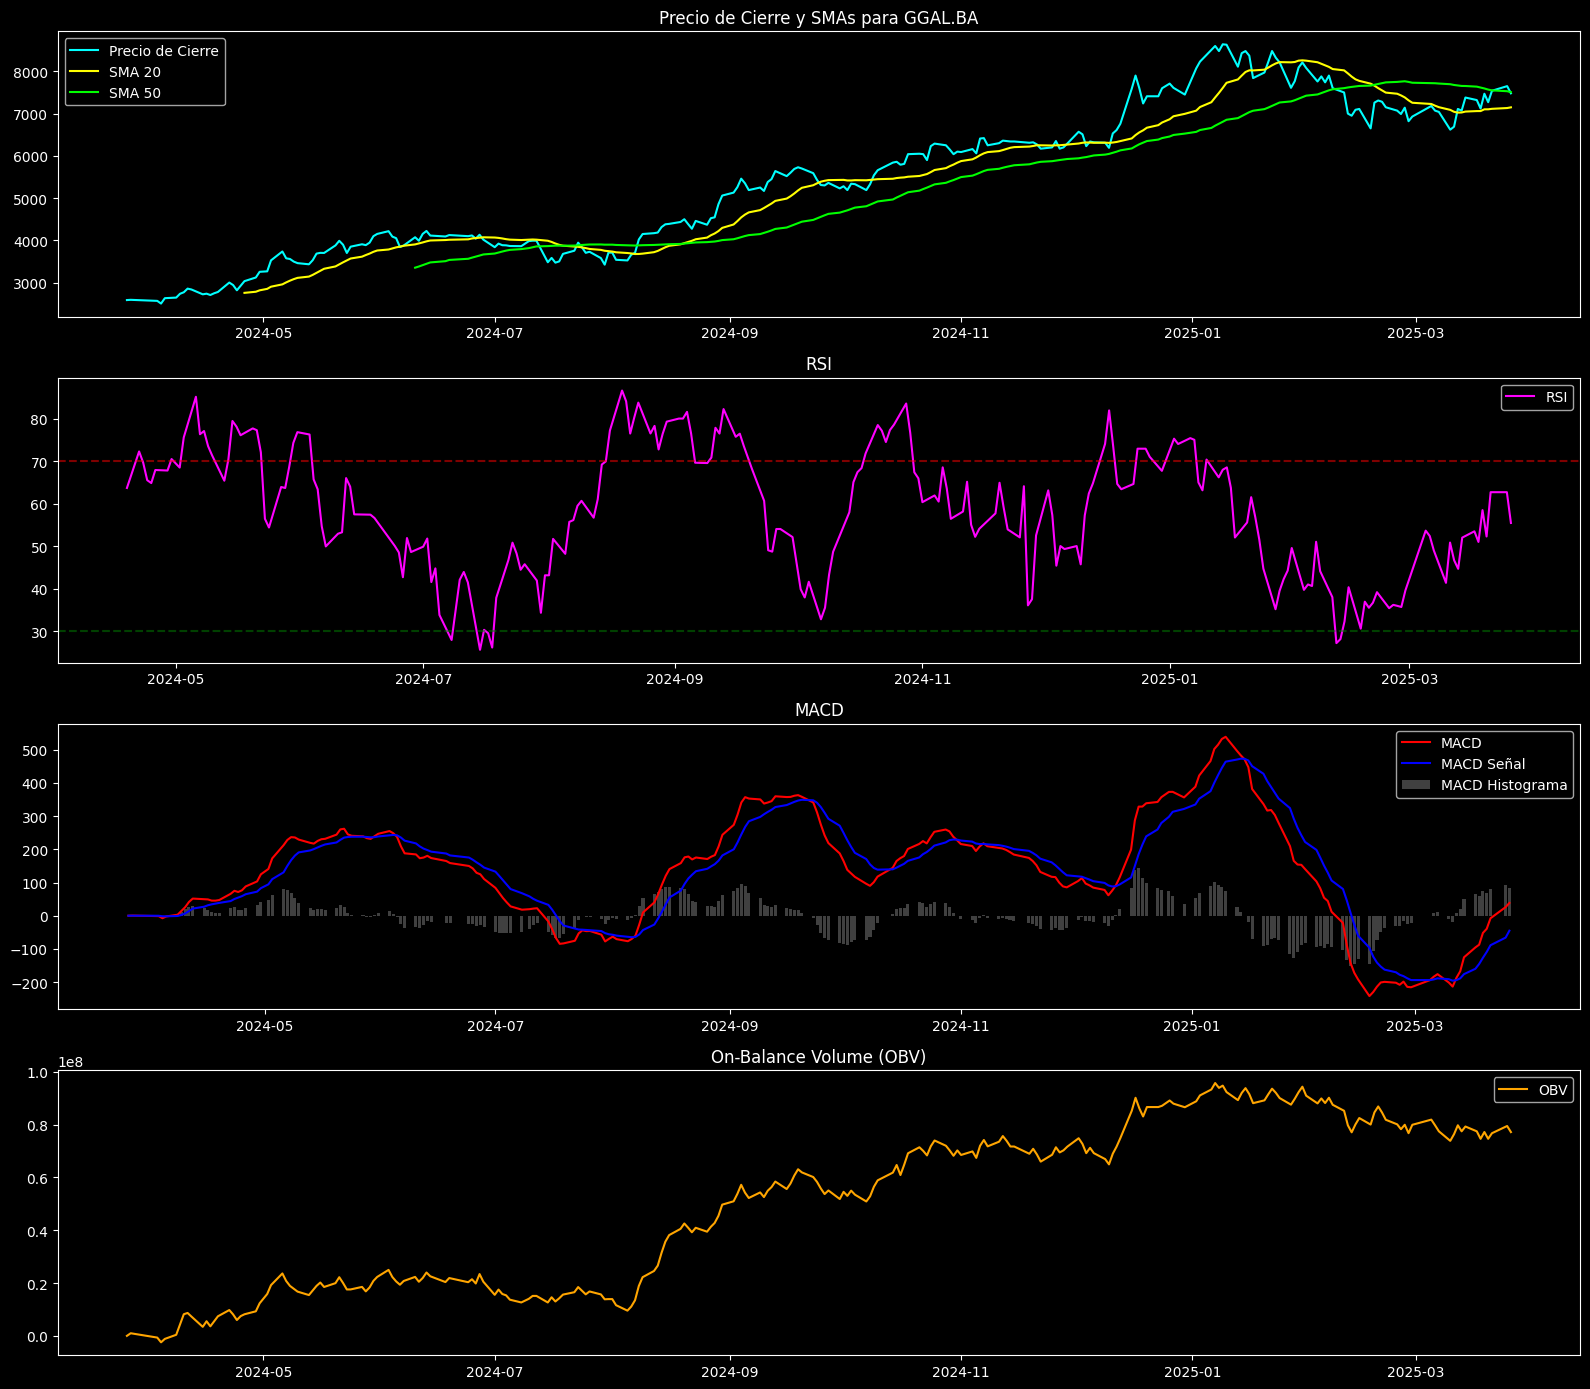

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def obtener_datos_y_calcular_indicadores_pandas(ticker, periodo="1y"):
    """Descarga datos y calcula indicadores técnicos con Pandas."""
    try:
        data = yf.download(ticker, period=periodo)
        if data.empty:
            print(f"No se encontraron datos para {ticker}")
            return None

        data['SMA_20'] = data['Close'].rolling(window=20).mean()
        data['SMA_50'] = data['Close'].rolling(window=50).mean()
        data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
        data['RSI'] = calcular_rsi(data['Close'], 14)
        data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = calcular_macd(data['Close'], 12, 26, 9) #Histrograma agregado
        data['ATR'] = calcular_atr(data['High'], data['Low'], data['Close'], 14)
        data['OBV'] = calcular_obv(data['Close'], data['Volume']) #Calcula OBV

        return data

    except Exception as e:
        print(f"Error: {e}")
        return None

def calcular_rsi(precios, periodo=14):
    delta = precios.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ma_up = up.rolling(window=periodo).mean()
    ma_down = down.rolling(window=periodo).mean()
    rsi = 100 - (100 / (1 + ma_up / ma_down))
    return rsi

def calcular_macd(precios, periodo_corto=12, periodo_largo=26, periodo_senal=9):
    """Calcula MACD, Señal y Histograma."""
    ema_corto = precios.ewm(span=periodo_corto, adjust=False).mean()
    ema_largo = precios.ewm(span=periodo_largo, adjust=False).mean()
    macd = ema_corto - ema_largo
    senal = macd.ewm(span=periodo_senal, adjust=False).mean()
    histograma = macd - senal # Calcula el histograma
    return macd, senal, histograma

def calcular_atr(high, low, close, periodo=14):
    high_low = high - low
    high_close = np.abs(high - close.shift())
    low_close = np.abs(low - close.shift())
    rango_verdadero = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = rango_verdadero.rolling(window=periodo).mean()
    return atr

def calcular_obv(close, volume):
    """Calcula el On-Balance Volume (OBV)."""
    obv = (np.sign(close.diff()) * volume).fillna(0).cumsum()
    return obv

def graficar_datos(data, ticker):
    if data is None:
        return

    # Establecer estilo oscuro
    plt.style.use('dark_background')
    plt.figure(figsize=(16, 14))

    # Subgráfico 1: Precio y SMAs
    plt.subplot(4, 1, 1)
    plt.plot(data['Close'], label='Precio de Cierre', color='cyan')
    plt.plot(data['SMA_20'], label='SMA 20', color='yellow')
    plt.plot(data['SMA_50'], label='SMA 50', color='lime')
    plt.title(f'Precio de Cierre y SMAs para {ticker}', color='white')
    plt.legend()

    # Subgráfico 2: RSI
    plt.subplot(4, 1, 2)
    plt.plot(data['RSI'], label='RSI', color='magenta')
    plt.axhline(70, color='red', linestyle='--', alpha=0.5)
    plt.axhline(30, color='green', linestyle='--', alpha=0.5)
    plt.title('RSI', color='white')
    plt.legend()

    # Subgráfico 3: MACD
    plt.subplot(4, 1, 3)
    plt.plot(data['MACD'], label='MACD', color='red')
    plt.plot(data['MACD_Signal'], label='MACD Señal', color='blue')
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histograma', color='grey', alpha=0.5)
    plt.title('MACD', color='white')
    plt.legend()

    # Subgráfico 4: OBV
    plt.subplot(4, 1, 4)
    plt.plot(data['OBV'], label='OBV', color='orange')
    plt.title('On-Balance Volume (OBV)', color='white')
    plt.legend()

    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
ticker = "GGAL.BA"
data = obtener_datos_y_calcular_indicadores_pandas(ticker)

if data is not None:
    print(data.tail())
    graficar_datos(data, ticker)

[*********************100%***********************]  1 of 1 completed


Price        Close    High     Low    Open   Volume  SMA_20       SMA_50  \
Ticker     GGAL.BA GGAL.BA GGAL.BA GGAL.BA  GGAL.BA                        
Date                                                                       
2025-03-19  7470.0  7510.0  7200.0  7220.0  2582617  7101.0  7594.912383   
2025-03-20  7270.0  7390.0  7230.0  7330.0  2570791  7101.5  7568.312383   
2025-03-21  7540.0  7560.0  7280.0  7320.0  2116698  7113.0  7549.512383   
2025-03-25  7650.0  7760.0  7560.0  7590.0  2729336  7131.5  7529.712383   
2025-03-26  7480.0  7750.0  7420.0  7650.0  2303858  7148.0  7506.712383   

Price            EMA_20        RSI       MACD MACD_Signal  MACD_Hist  \
Ticker                                                                 
Date                                                                   
2025-03-19  7178.464656  58.450704 -51.866942 -126.681367  74.814425   
2025-03-20  7187.182308  52.249135 -39.462786 -109.237651  69.774865   
2025-03-21  7220.783993  62.676

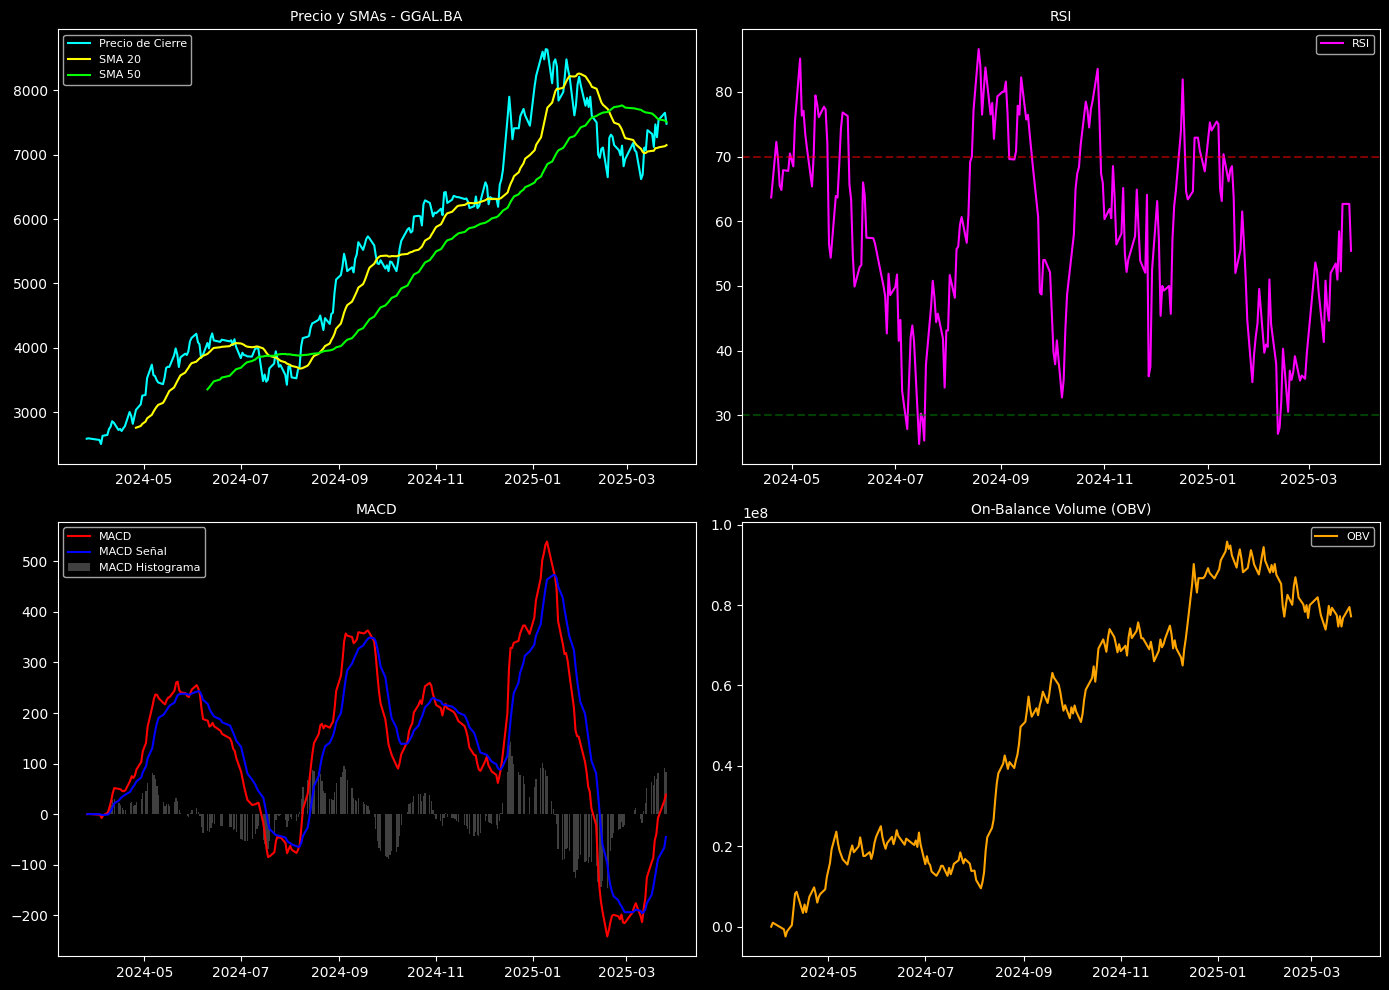

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Funciones sin cambios (obtener_datos_y_calcular_indicadores_pandas, calcular_rsi, etc.)
def obtener_datos_y_calcular_indicadores_pandas(ticker, periodo="1y"):
    """Descarga datos y calcula indicadores técnicos con Pandas."""
    try:
        data = yf.download(ticker, period=periodo)
        if data.empty:
            print(f"No se encontraron datos para {ticker}")
            return None

        data['SMA_20'] = data['Close'].rolling(window=20).mean()
        data['SMA_50'] = data['Close'].rolling(window=50).mean()
        data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
        data['RSI'] = calcular_rsi(data['Close'], 14)
        data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = calcular_macd(data['Close'], 12, 26, 9)
        data['ATR'] = calcular_atr(data['High'], data['Low'], data['Close'], 14)
        data['OBV'] = calcular_obv(data['Close'], data['Volume'])

        return data

    except Exception as e:
        print(f"Error: {e}")
        return None

def calcular_rsi(precios, periodo=14):
    delta = precios.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ma_up = up.rolling(window=periodo).mean()
    ma_down = down.rolling(window=periodo).mean()
    rsi = 100 - (100 / (1 + ma_up / ma_down))
    return rsi

def calcular_macd(precios, periodo_corto=12, periodo_largo=26, periodo_senal=9):
    ema_corto = precios.ewm(span=periodo_corto, adjust=False).mean()
    ema_largo = precios.ewm(span=periodo_largo, adjust=False).mean()
    macd = ema_corto - ema_largo
    senal = macd.ewm(span=periodo_senal, adjust=False).mean()
    histograma = macd - senal
    return macd, senal, histograma

def calcular_atr(high, low, close, periodo=14):
    high_low = high - low
    high_close = np.abs(high - close.shift())
    low_close = np.abs(low - close.shift())
    rango_verdadero = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = rango_verdadero.rolling(window=periodo).mean()
    return atr

def calcular_obv(close, volume):
    obv = (np.sign(close.diff()) * volume).fillna(0).cumsum()
    return obv

def graficar_datos(data, ticker):
    if data is None:
        return

    # Establecer estilo oscuro
    plt.style.use('dark_background')
    plt.figure(figsize=(14, 10))  # Tamaño ajustado para 2 columnas

    # Subgráfico 1: Precio y SMAs (arriba izquierda)
    plt.subplot(2, 2, 1)
    plt.plot(data['Close'], label='Precio de Cierre', color='cyan')
    plt.plot(data['SMA_20'], label='SMA 20', color='yellow')
    plt.plot(data['SMA_50'], label='SMA 50', color='lime')
    plt.title(f'Precio y SMAs - {ticker}', color='white', fontsize=10)
    plt.legend(fontsize=8)

    # Subgráfico 2: RSI (arriba derecha)
    plt.subplot(2, 2, 2)
    plt.plot(data['RSI'], label='RSI', color='magenta')
    plt.axhline(70, color='red', linestyle='--', alpha=0.5)
    plt.axhline(30, color='green', linestyle='--', alpha=0.5)
    plt.title('RSI', color='white', fontsize=10)
    plt.legend(fontsize=8)

    # Subgráfico 3: MACD (abajo izquierda)
    plt.subplot(2, 2, 3)
    plt.plot(data['MACD'], label='MACD', color='red')
    plt.plot(data['MACD_Signal'], label='MACD Señal', color='blue')
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histograma', color='grey', alpha=0.5)
    plt.title('MACD', color='white', fontsize=10)
    plt.legend(fontsize=8)

    # Subgráfico 4: OBV (abajo derecha)
    plt.subplot(2, 2, 4)
    plt.plot(data['OBV'], label='OBV', color='orange')
    plt.title('On-Balance Volume (OBV)', color='white', fontsize=10)
    plt.legend(fontsize=8)

    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
ticker = "GGAL.BA"
data = obtener_datos_y_calcular_indicadores_pandas(ticker)

if data is not None:
    print(data.tail())
    graficar_datos(data, ticker)